# CITIBANK PROJECT (The Data Incubator)

## 1. Introduction
__Maikol Cerda__

Postdoc Fellow at Yale (2019-)

Ph.D. in Economics from New York University (2014-2019)

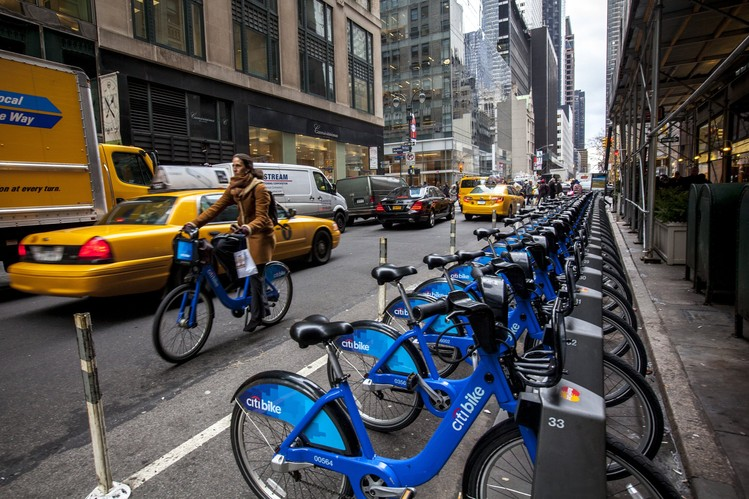

In [1]:
from IPython.display import Image
img_city_1 = 'C:/Users/Maikol Cerda/Desktop/city1.jpg'
Image(filename=img_city_1)

## 2. Today's Goal 

__Optimize citibank service in New York City__

$$ \text{For } y \in \mathbb{R} \text{,     } y=monthly-number-of-trips=f(x) = f\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
     number-of-visitors  \\
     temperature  \\
    rain  \\
    other-transportation-methods  \\
    season \\
\end{pmatrix}\tag{1} $$

## 3. Big goal: Micro-Analysis 

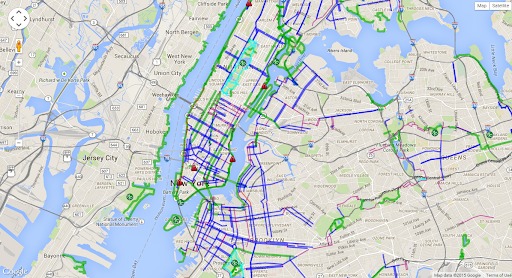

In [11]:
img_city_2 = 'C:/Users/Maikol Cerda/Desktop/city2.png'
Image(filename=img_city_2)

## 4. Databases Descriptions

### a. Citibike Trips' Data (daily)

[https://www.citibikenyc.com/system-data](https://www.citibikenyc.com/system-data)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| cvs files      | 60 monthly items | 2015-2019, 13.6GB |
| ------------- |__Features__| -----:|
|trip duration	| start time |	stop time|	
|start station id	| start station name	|start station lat/lon|
|end station id |	end station name	| end station lat/lon|	
|bike id | 	 birth year |	gender |


### b. Taxis and Ridesharing Trips' Data (monthly)

TLC Trip Record Data

[https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| cvs files      | 60 monthly items | 2015-2019, 0.8GB |
| ------------- |__Features__| -----:|
|License Class |	Trips Per Day |		Unique Vehicles	Vehicles Per Day	| 
|Avg Days Vehicles on Road	|Avg Hours Per Day Per Vehicle|	Avg Days Drivers on Road|	
|Avg Hours Per Day Per Driver|	Avg Minutes Per Trip	|Percent of Trips Paid with Credit Card	|

### c. Weather's Data (daily)

Weather Undergraund

[https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2019-10](https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2019-10)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| web scraping      | 60 monthly items | 2015-2019, 1.5GB |
| ------------- |__Features (max, min, av)__| -----:|
|T (° F) |	Dew Point (° F)	| Humidity (%) |	
|Wind Speed (mph) |	Pressure (Hg)	| Precipitation (in) |

### d. Tourists-Passengers' Data (monthly)

Airport Traffic Report, Porth Authority NY-NJ

[https://www.panynj.gov/airports/en/statistics-general-info.html](https://www.panynj.gov/airports/en/statistics-general-info.html)

| Feature          | Outcome           | Description  |
| ------------- |:-------------:| -----:|
| pdf files      | 5 yearly items | 2015-2019, 40MB |
| ------------- |__Features __| -----:|
|Domestic Pass. |	International Pass.	| Others |	


In [4]:
#Importing relevant packages
import numpy as np
import pandas as pd

from sklearn import preprocessing

import matplotlib.pylab as plt
from matplotlib import pyplot

import seaborn as sns
%matplotlib inline 

In [5]:
######################################
##1. APPENDING 60 CITIBIKE DATABASES##
######################################
import os
import csv

pathName = "C:/Users/Maikol Cerda/Documents/MAIKOL/1.- Academicos/7.- YALE Postdoc/4.- Data Incubator Application/Transit/Citibank trips/Citibank trips/"

#Creating a list with the name of csv files in pathName
numFiles = []
fileNames = os.listdir(pathName)
for fileNames in fileNames:
    if fileNames.endswith(".csv"):
        numFiles.append(fileNames)

numFiles=np.asarray(numFiles)


In [9]:
#Create the first csv
base_total = pd.read_csv(os.path.join(pathName, numFiles[1]))
base_total.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [10]:
#Appendind the rest of the csv files (HEAVY)
#for i in numFiles[1:]:
#    file = pd.read_csv(os.path.join(pathName, i))
#    base = base.append(file)

In [14]:
#####################################
# 2.- Working with processed database
#####################################

# Read the Example1.txt
path_1 = "C:/Users/Maikol Cerda/Desktop/citibike_data.csv"
df=pd.read_csv(path_1)

df.head()

,date,time,season,year,total_trips,avg_trip_duration,Gender,dom_passengers,int_passengers,T_Max,...,W_Max,W_Avg,W_Min,Rain,rd_trips_per_day,rd_vehicles_per_day,rd_unique_drives,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives
0,15-Jan,1,winter,2015,5695,1576.648464,Female,39903.0,18087.0,35.322581,...,20.677419,12.522581,5.354839,0.152581,87766.0,12044.0,21302.0,459897,17219,38155
1,15-Feb,2,winter,2015,2303,1460.534086,Female,37358.0,16130.0,31.392857,...,20.392857,12.021429,4.392857,0.072857,109041.0,13541.0,22084.0,500875,17702,37849
2,15-Mar,3,winter,2015,12935,1812.818864,Female,44183.0,19108.0,44.645161,...,19.032258,10.706452,3.129032,0.141935,104691.0,13480.0,23148.0,486236,17865,38864
3,15-Apr,4,spring,2015,66373,1965.599807,Female,44814.0,20070.0,60.800000,...,20.466667,11.440000,3.233333,0.028333,129150.0,17953.0,30808.0,491174,18130,38962
4,15-May,5,spring,2015,167866,1888.198766,Female,45160.0,20545.0,75.580645,...,17.483871,9.361290,2.419355,0.010645,136517.0,15399.0,32886.0,482096,18183,38955


In [15]:
#MISSING DATA ANALISIS
#Dropping na
df.replace("?", np.nan, inplace = True)

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

date
False    180
Name: date, dtype: int64

time
False    180
Name: time, dtype: int64

season
False    180
Name: season, dtype: int64

year
False    180
Name: year, dtype: int64

total_trips
False    180
Name: total_trips, dtype: int64

avg_trip_duration
False    180
Name: avg_trip_duration, dtype: int64

Gender
False    180
Name: Gender, dtype: int64

dom_passengers
False    144
True      36
Name: dom_passengers, dtype: int64

int_passengers
False    144
True      36
Name: int_passengers, dtype: int64

T_Max
False    180
Name: T_Max, dtype: int64

T_Avg
False    180
Name: T_Avg, dtype: int64

T_Min
False    180
Name: T_Min, dtype: int64

H_Max
False    180
Name: H_Max, dtype: int64

H_Avg
False    180
Name: H_Avg, dtype: int64

H_Min
False    180
Name: H_Min, dtype: int64

W_Max
False    180
Name: W_Max, dtype: int64

W_Avg
False    180
Name: W_Avg, dtype: int64

W_Min
False    180
Name: W_Min, dtype: int64

Rain
False    180
Name: Rain, dtype: int64

rd_trips_per_day
False    177
Tr

In [16]:
#REPLACING MISSING VALUES
avg_dom_pass = df["dom_passengers"].astype("float").mean(axis=0)
avg_int_pass = df["int_passengers"].astype("float").mean(axis=0)
avg_dom_pass = df["rd_trips_per_day"].astype("float").mean(axis=0)
avg_int_pass = df["rd_vehicles_per_day"].astype("float").mean(axis=0)
avg_dom_pass = df["rd_unique_drives"].astype("float").mean(axis=0)

df["dom_passengers"].replace(np.nan, avg_dom_pass, inplace=True)
df["int_passengers"].replace(np.nan, avg_dom_pass, inplace=True)
df["rd_trips_per_day"].replace(np.nan, avg_dom_pass, inplace=True)
df["rd_vehicles_per_day"].replace(np.nan, avg_dom_pass, inplace=True)
df["rd_unique_drives"].replace(np.nan, avg_dom_pass, inplace=True)

In [19]:
#MISSING DATA POST ANALYSIS
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

date
False    180
Name: date, dtype: int64

time
False    180
Name: time, dtype: int64

season
False    180
Name: season, dtype: int64

year
False    180
Name: year, dtype: int64

total_trips
False    180
Name: total_trips, dtype: int64

avg_trip_duration
False    180
Name: avg_trip_duration, dtype: int64

Gender
False    180
Name: Gender, dtype: int64

dom_passengers
False    180
Name: dom_passengers, dtype: int64

int_passengers
False    180
Name: int_passengers, dtype: int64

T_Max
False    180
Name: T_Max, dtype: int64

T_Avg
False    180
Name: T_Avg, dtype: int64

T_Min
False    180
Name: T_Min, dtype: int64

H_Max
False    180
Name: H_Max, dtype: int64

H_Avg
False    180
Name: H_Avg, dtype: int64

H_Min
False    180
Name: H_Min, dtype: int64

W_Max
False    180
Name: W_Max, dtype: int64

W_Avg
False    180
Name: W_Avg, dtype: int64

W_Min
False    180
Name: W_Min, dtype: int64

Rain
False    180
Name: Rain, dtype: int64

rd_trips_per_day
False    180
Name: rd_trips_per_day, dtyp

In [21]:
#TYPE OF DATA BY COLUMN
df.dtypes

date                      object
time                       int64
season                    object
year                       int64
total_trips                int64
avg_trip_duration        float64
Gender                    object
dom_passengers           float64
int_passengers           float64
T_Max                    float64
T_Avg                    float64
T_Min                    float64
H_Max                    float64
H_Avg                    float64
H_Min                    float64
W_Max                    float64
W_Avg                    float64
W_Min                    float64
Rain                     float64
rd_trips_per_day         float64
rd_vehicles_per_day      float64
rd_unique_drives         float64
taxi_trips_per_day         int64
taxi_vehicles_per_day      int64
taxi_unique_drives         int64
dtype: object

In [22]:
#GENERAL STATISTIC SUMMARY VARIABLES
df.describe()

,time,year,total_trips,avg_trip_duration,dom_passengers,int_passengers,T_Max,T_Avg,T_Min,H_Max,...,W_Max,W_Avg,W_Min,Rain,rd_trips_per_day,rd_vehicles_per_day,rd_unique_drives,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,30.500000,2017.000000,4.345068e+05,1251.227974,51034.833616,32660.850282,63.459666,56.770743,50.683563,77.458743,...,18.225717,10.699774,3.695945,0.126156,492726.734746,50232.234746,79193.084746,350427.550000,15370.233333,31535.266667
std,17.366409,1.418158,3.884054e+05,563.984697,14270.113598,23399.772726,16.647548,16.155546,16.144828,4.645865,...,1.790950,1.425204,1.246789,0.059561,227022.770850,17509.999623,24753.290357,77130.730594,1958.080862,5130.802031
min,1.000000,2015.000000,2.303000e+03,622.560400,37358.000000,16130.000000,31.392857,24.550000,16.821429,67.032258,...,15.322581,8.212903,1.290323,0.010645,79193.084746,12044.000000,21302.000000,207664.000000,11752.000000,22616.000000
25%,15.750000,2016.000000,1.680948e+05,827.653650,43668.750000,20073.750000,47.419355,40.742742,35.185484,74.025806,...,16.919355,9.506667,2.866667,0.074214,321348.750000,38897.500000,64617.500000,289055.000000,13537.250000,27003.500000
50%,30.500000,2017.000000,2.613205e+05,950.611700,45101.500000,21502.500000,64.751075,57.390000,51.118817,77.661290,...,18.000000,10.633226,3.426344,0.124032,499450.500000,54971.500000,88528.000000,346334.000000,15494.000000,31497.500000
75%,45.250000,2018.000000,6.286990e+05,1817.935061,46639.500000,24447.250000,79.600000,72.278333,65.641667,80.379032,...,19.546947,11.915323,4.702419,0.168306,702732.500000,64097.750000,99244.750000,418947.000000,17463.750000,36586.500000
max,60.000000,2019.000000,1.612056e+06,2587.882000,79193.084746,79193.084746,88.612903,81.016129,75.096774,87.419355,...,22.387097,14.029032,7.161290,0.305161,812119.000000,79193.084746,106874.000000,500875.000000,18186.000000,38962.000000


In [23]:
#CREATING DUMMY VARIABLES

#dummy per gender
dummy_variable_gender = pd.get_dummies(df["Gender"])
dummy_variable_gender.head()
#dummy per season
dummy_variable_season = pd.get_dummies(df["season"])
dummy_variable_season.head()

,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [24]:
# MERGE DATAFRAME AND DUMMY VARIABLES DF 
df = pd.concat([df, dummy_variable_gender, dummy_variable_season], axis=1)
df.head()

,date,time,season,year,total_trips,avg_trip_duration,Gender,dom_passengers,int_passengers,T_Max,...,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives,Female,Male,Not_identified,fall,spring,summer,winter
0,15-Jan,1,winter,2015,5695,1576.648464,Female,39903.0,18087.0,35.322581,...,459897,17219,38155,1,0,0,0,0,0,1
1,15-Feb,2,winter,2015,2303,1460.534086,Female,37358.0,16130.0,31.392857,...,500875,17702,37849,1,0,0,0,0,0,1
2,15-Mar,3,winter,2015,12935,1812.818864,Female,44183.0,19108.0,44.645161,...,486236,17865,38864,1,0,0,0,0,0,1
3,15-Apr,4,spring,2015,66373,1965.599807,Female,44814.0,20070.0,60.800000,...,491174,18130,38962,1,0,0,0,1,0,0
4,15-May,5,spring,2015,167866,1888.198766,Female,45160.0,20545.0,75.580645,...,482096,18183,38955,1,0,0,0,1,0,0


In [25]:
#NORMALIZTION OF CONTINUOUS VARIABLES
cols=['total_trips', "avg_trip_duration", "dom_passengers", "int_passengers", "T_Max", "T_Avg", "T_Min", "H_Max", "H_Avg", "H_Min", "W_Max", "W_Avg", "W_Min",
 "Rain", "rd_trips_per_day", "rd_vehicles_per_day", "rd_unique_drives", "taxi_trips_per_day", "taxi_vehicles_per_day", "taxi_unique_drives"]

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[cols])
#re-concatenating the rest of variables
df_normalized = pd.concat([df['date'],df['time'],df['season'],df["year"],df['Gender'], pd.DataFrame(np_scaled, columns = cols) ,dummy_variable_gender, dummy_variable_season], axis=1) 
#saving the dataset
df_normalized.to_csv("normalized_data.csv", index=False)

df_normalized.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,date,time,season,year,Gender,total_trips,avg_trip_duration,dom_passengers,int_passengers,T_Max,...,taxi_trips_per_day,taxi_vehicles_per_day,taxi_unique_drives,Female,Male,Not_identified,fall,spring,summer,winter
0,15-Jan,1,winter,2015,Female,0.002107,0.485462,0.060834,0.031032,0.068677,...,0.860244,0.849705,0.950630,1,0,0,0,0,0,1
1,15-Feb,2,winter,2015,Female,0.000000,0.426380,0.000000,0.000000,0.000000,...,1.000000,0.924775,0.931910,1,0,0,0,0,0,1
2,15-Mar,3,winter,2015,Female,0.006605,0.605630,0.163141,0.047223,0.231602,...,0.950073,0.950109,0.994005,1,0,0,0,0,0,1
3,15-Apr,4,spring,2015,Female,0.039801,0.683369,0.178224,0.062477,0.513931,...,0.966915,0.991296,1.000000,1,0,0,0,1,0,0
4,15-May,5,spring,2015,Female,0.102850,0.643985,0.186494,0.070009,0.772243,...,0.935954,0.999534,0.999572,1,0,0,0,1,0,0


In [26]:
#CORRELATION ANALYSIS MAIN VARIABLES
df[['total_trips', 'dom_passengers', 'int_passengers', 'T_Avg', 'Rain',"taxi_vehicles_per_day"]].corr() 

,total_trips,dom_passengers,int_passengers,T_Avg,Rain,taxi_vehicles_per_day
total_trips,1.000000,0.202479,0.194033,0.345856,0.021132,-0.281150
dom_passengers,0.202479,1.000000,0.995173,0.049479,0.125627,-0.714958
int_passengers,0.194033,0.995173,1.000000,0.023701,0.139486,-0.724540
T_Avg,0.345856,0.049479,0.023701,1.000000,-0.126825,-0.066957
Rain,0.021132,0.125627,0.139486,-0.126825,1.000000,-0.377099
taxi_vehicles_per_day,-0.281150,-0.714958,-0.724540,-0.066957,-0.377099,1.000000


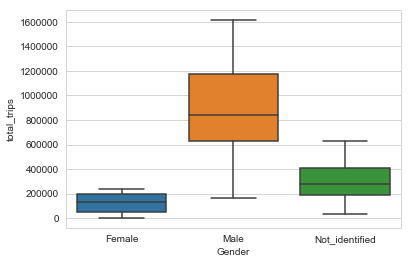

In [27]:
# GENERAL ANALYSIS PER-GENDER
sns.set_style('whitegrid')
sns.boxplot(x="Gender", y="total_trips", data=df)

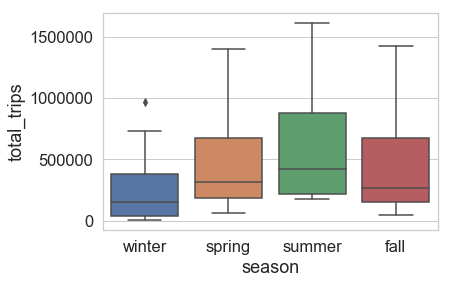

In [45]:
#GENERAL ANALYSIS PER SEASON
sns.boxplot(x="season", y="total_trips", data=df)

In [46]:
df_can=df[['year', 'Gender', 'total_trips']]
df_pivot = df_can.pivot_table(index='Gender',columns=['year'],aggfunc=sum, fill_value=0).T
# cast the Years (the index) to type int
#df_pivot.index = map(float, df_pivot.index)

# let's label the index. This will automatically be the column name when we reset the index
df_pivot.index.name = 'year'

# reset index to bring the Year in as a column
df_pivot.reset_index(inplace=True)

#Droping unnecesary column
df_pivot=df_pivot.drop(["level_0"], axis=1)

#Converting year column to int type of data
df_pivot[["year"]] = df_pivot[["year"]].astype("int")

# view the changes
df_pivot.head()

Gender,year,Female,Male,Not_identified
0,2015,1316822,6584603,1999443
1,2016,1621342,9238547,2985766
2,2017,1694623,10955046,3714988
3,2018,1484555,11971322,4092462
4,2019,1560308,14052393,4938996


In [47]:
# normalize Female data
norm_female = (df_pivot['Female'] - df_pivot['Female'].min()) / (df_pivot['Female'].max() - df_pivot['Female'].min())
# normalize Male data
norm_male = (df_pivot['Male'] - df_pivot['Male'].min()) / (df_pivot['Male'].max() - df_pivot['Male'].min())
# normalize non data
norm_non = (df_pivot['Not_identified'] - df_pivot['Not_identified'].min()) / (df_pivot['Not_identified'].max() - df_pivot['Not_identified'].min())

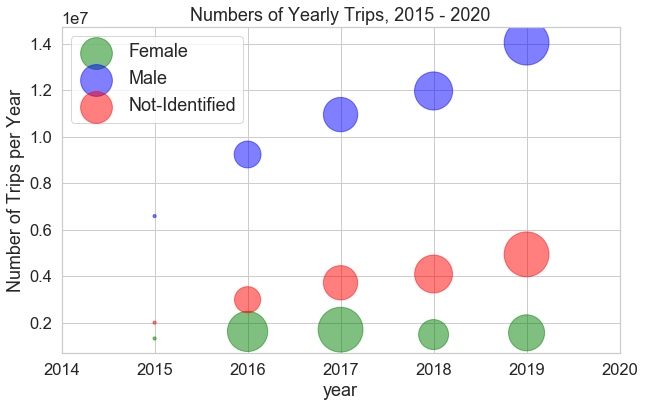

In [48]:
# Female
ax0 = df_pivot.plot(kind='scatter',
                    x='year',
                    y='Female',
                    figsize=(10, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_female * 2000 + 10,  # pass in weights 
                    xlim=(2014, 2020)
                   )

# Male
ax1 = df_pivot.plot(kind='scatter',
                    x='year',
                    y='Male',
                    alpha=0.5,
                    color="blue",
                    s=norm_male * 2000 + 10,
                    ax = ax0
                   )

# Non-identified
ax2 = df_pivot.plot(kind='scatter',
                    x='year',
                    y='Not_identified',
                    alpha=0.5,
                    color="red",
                    s=norm_non * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Trips per Year')
ax0.set_title('Numbers of Yearly Trips, 2015 - 2020')
ax0.legend(['Female', 'Male', 'Not-Identified'], loc='upper left', fontsize='medium')

Text(0.5, 1.0, 'Total Number of Trips as a Function of Temperature')

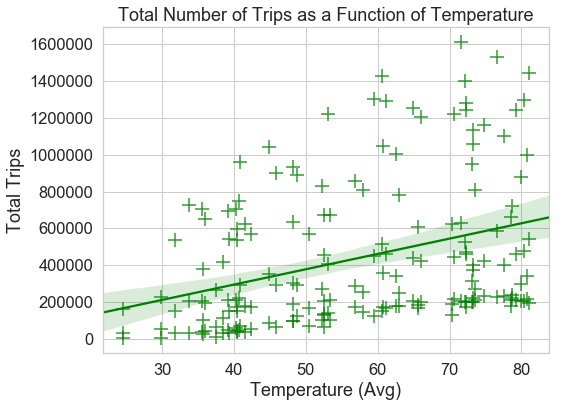

In [49]:
#UNIVARIATE REGRESSIONAN ANALYSIS 1.0
plt.figure(figsize=(8, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='T_Avg', y='total_trips', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Temperature (Avg)', ylabel='Total Trips')
ax.set_title('Total Number of Trips as a Function of Temperature')

Text(0.5, 1.0, 'Total Number of Trips as a Function of the Number of Taxis')

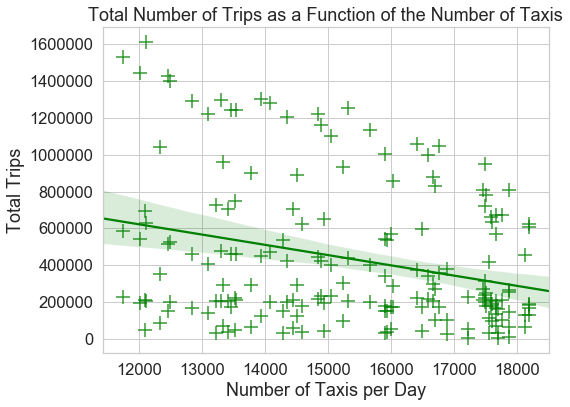

In [50]:
#UNIVARIATE REGRESSIONAN ANALYSIS 2.0
plt.figure(figsize=(8, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='taxi_vehicles_per_day', y='total_trips', data=df, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Number of Taxis per Day', ylabel='Total Trips')
ax.set_title('Total Number of Trips as a Function of the Number of Taxis')

In [51]:
#REGRESSION ANALYSIS
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [52]:
X = df_normalized[["dom_passengers", "int_passengers", "T_Avg", "taxi_vehicles_per_day", "Rain", "Female", "Male", "fall", "spring", "summer"]]
Y = df_normalized['total_trips']

In [53]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
lm.coef_

array([-0.11143813,  0.08663544,  0.34767966, -0.24256994, -0.07202366,
       -0.1040947 ,  0.36310183,  0.0194305 , -0.00262125, -0.06325119])

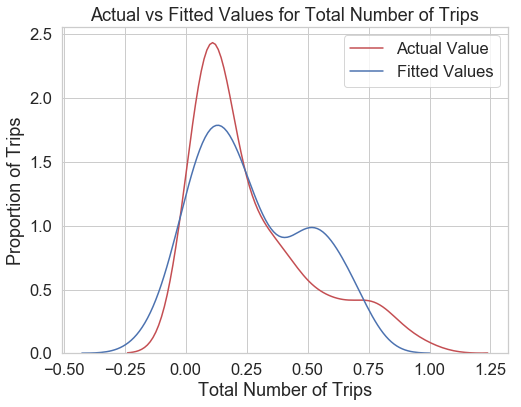

In [55]:
#MODEL EVALUATION
#DISTRIBUTIONAL ANALYSIS OF TRIPS
Y_hat=lm.predict(X)

width=8
height=6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_normalized['total_trips'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Total Number of Trips')
plt.xlabel('Total Number of Trips')
plt.ylabel('Proportion of Trips')

plt.show()
plt.close()

In [56]:
#MODEL EVALUATION

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, Y_hat)
r_squared = r2_score(Y, Y_hat)

print('The mean square error of price and predicted value is: ', mse)
print('The R-square value is: ', r_squared)

The mean square error of price and predicted value is:  0.006474786978672344
The R-square value is:  0.8881610719805934


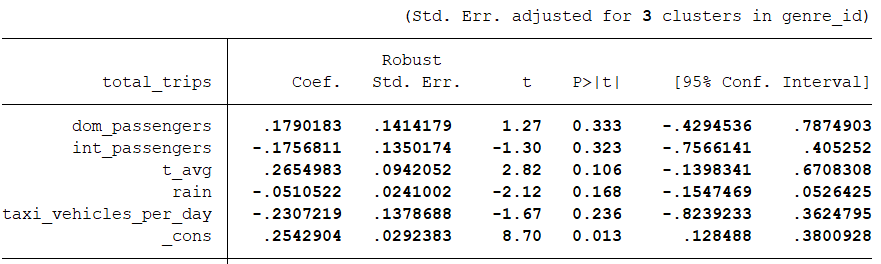

In [57]:
#Importing Outcome from Stata.
#STATA code
#Generating gender id
#egen gender_id = group(gender), label lname(gender)
#defininng panel data
#xtset gender_id time
#regression panel data style
#xtreg total_trips dom_passengers int_passengers t_avg rain taxi_vehicles_per_day, fe robust

img = 'C:/Users/Maikol Cerda/Desktop/regression.png'
Image(filename=img)

#Initialize the project with a citibike picture and what you want to do in Mathematical terms


#Include the pre-processing daily data on citibike